In [1]:
import numpy as np 
from scipy.stats import skewnorm
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from sklearn import linear_model
from scipy.interpolate import interp1d

In [2]:
blue = pd.read_csv('./data/2011 HBBW.csv')
white = pd.read_csv('./data/2011 HBWW.csv')

In [3]:
blue

,ge,Column2,sml,obs,sum,pct,accumpct,graph
0,0,-,2.0,208,27588.04,2.8,2.8,|==
1,2,-,4.0,878,74026.40,7.6,10.4,|=======
2,4,-,6.0,1780,115981.50,11.8,22.2,|===========
3,6,-,8.0,2611,116729.25,11.9,34.1,|===========
4,8,-,10.0,3319,111889.38,11.4,45.5,|===========
5,10,-,12.0,4187,98216.14,10.0,55.5,|==========
6,12,-,14.0,4862,85388.87,8.7,64.2,|========
7,14,-,16.0,5419,71002.94,7.2,71.5,|=======
8,16,-,18.0,6011,58751.44,6.0,77.5,|=====
9,18,-,20.0,6575,49036.71,5.0,82.5,|=====


In [4]:
white

,ge,Column2,sml,obs,sum,pct,accumpct,graph
0,0,-,2.0,153,194.92,0.1,0.1,|
1,2,-,4.0,678,1519.57,0.5,0.6,|
2,4,-,6.0,1339,5021.47,1.7,2.2,|=
3,6,-,8.0,2000,6896.64,2.3,4.5,|==
4,8,-,10.0,2495,8552.43,2.9,7.4,|==
5,10,-,12.0,3053,11796.94,3.9,11.3,|===
6,12,-,14.0,3647,11984.55,4.0,15.3,|===
7,14,-,16.0,4128,13162.42,4.4,19.7,|====
8,16,-,18.0,4486,13761.60,4.6,24.3,|====
9,18,-,20.0,5027,15359.90,5.1,29.4,|=====


In [5]:
def getSampleData(df):
    rs = []
    for i in df.index:
        start = df.at[i,'ge']
        length = int(df.at[i,'sum'])
        step = 2
        if start < 60:
            rstemp = [start  + step * random() for num in range(length)]
        else:
            rstemp = np.random.triangular(60,60,200,size = length)
        rs.extend(rstemp)
    return rs

rsblue = getSampleData(blue)
rswhite = getSampleData(white)

(array([1.08533549e-02, 2.93121358e-02, 4.69631701e-02, 4.81487844e-02,
        4.72102224e-02, 4.30627395e-02, 3.82867905e-02, 3.32094142e-02,
        2.86367809e-02, 2.53872758e-02, 2.19462757e-02, 1.83023538e-02,
        1.61194682e-02, 1.36678590e-02, 1.14179894e-02, 9.94395057e-03,
        8.54319992e-03, 7.20943312e-03, 6.08528639e-03, 5.44263539e-03,
        4.51037771e-03, 4.00169442e-03, 3.46070127e-03, 2.91300973e-03,
        2.54696265e-03, 2.25341575e-03, 1.94450196e-03, 1.77507221e-03,
        1.48782967e-03, 1.24865790e-03, 4.85041929e-04, 2.26169023e-04,
        2.34443499e-04, 2.30503272e-04, 2.19076614e-04, 2.16318456e-04,
        2.34443499e-04, 2.21440751e-04, 2.09620070e-04, 2.05679843e-04,
        2.14348342e-04, 1.91495026e-04, 2.07255934e-04, 1.93465140e-04,
        1.76916187e-04, 1.85584686e-04, 1.87554799e-04, 1.74552051e-04,
        1.61943325e-04, 1.84008595e-04, 1.57609075e-04, 1.71399869e-04,
        1.60761257e-04, 1.48546553e-04, 1.42636213e-04, 1.489405

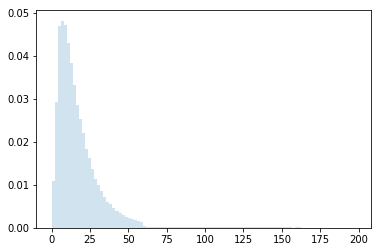

In [6]:
combined = rsblue.copy()
combined.extend(rswhite)

fig, ax = plt.subplots(1, 1)
ax.hist(combined, density=True, histtype='stepfilled', alpha=0.2,bins = 100)

In [7]:
len(combined),len(rsblue),len(rswhite)

(1280450, 980445, 300005)

In [8]:
skewnorm.fit(combined)

(22.88069415430823, 1.2849306862225918, 23.42902717691951)

In [9]:
sn = skewnorm(22.842927048163425, 1.2844836255580607, 23.450906987154177)

In [10]:
r = sn.rvs(size=1000000)

(array([1.2000e+01, 1.0400e+02, 6.7600e+02, 3.0330e+03, 8.8860e+03,
        1.8569e+04, 2.8794e+04, 3.5752e+04, 3.9198e+04, 3.9603e+04,
        3.9723e+04, 3.8768e+04, 3.8368e+04, 3.7394e+04, 3.6883e+04,
        3.5868e+04, 3.5065e+04, 3.3804e+04, 3.3033e+04, 3.1410e+04,
        3.0642e+04, 2.9411e+04, 2.8015e+04, 2.7196e+04, 2.5436e+04,
        2.4303e+04, 2.3193e+04, 2.2050e+04, 2.0413e+04, 1.9617e+04,
        1.8226e+04, 1.7128e+04, 1.5742e+04, 1.4742e+04, 1.3906e+04,
        1.2760e+04, 1.1904e+04, 1.0969e+04, 1.0115e+04, 9.0490e+03,
        8.5650e+03, 7.6310e+03, 7.0620e+03, 6.4870e+03, 5.7200e+03,
        5.1600e+03, 4.4280e+03, 4.1260e+03, 3.8310e+03, 3.3420e+03,
        3.0050e+03, 2.6780e+03, 2.3360e+03, 2.1180e+03, 1.8270e+03,
        1.6040e+03, 1.4690e+03, 1.2090e+03, 1.1330e+03, 9.1100e+02,
        8.1700e+02, 6.8800e+02, 6.0200e+02, 5.5300e+02, 4.7600e+02,
        3.8500e+02, 3.0900e+02, 2.6000e+02, 2.3500e+02, 2.2400e+02,
        1.7200e+02, 1.3800e+02, 1.4500e+02, 9.30

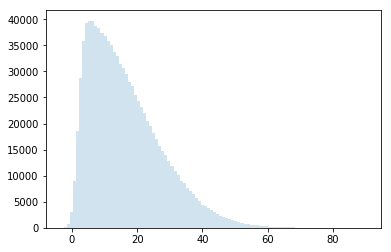

In [34]:
fig, ax = plt.subplots(1, 1)
ax.hist(r,histtype='stepfilled', alpha=0.2,bins = 100)

In [12]:
# ==============methods 2===============

In [13]:
combined_sm60 = [x for x in combined if x < 60]

(array([ 8307.,  8306.,  8373., 17987., 22744., 22501., 27188., 36547.,
        36139., 36237., 37002., 36779., 37279., 36310., 36347., 36275.,
        34943., 33017., 32922., 33202., 29070., 29299., 29210., 26529.,
        25438., 25229., 24076., 21608., 22102., 21485., 19281., 19444.,
        19162., 17484., 16471., 16670., 15828., 13852., 13687., 13696.,
        12268., 12488., 11965., 11083., 10206., 10160.,  9670.,  8631.,
         8463.,  8442.,  7568.,  7565.,  7529.,  6825.,  6334.,  6409.,
         6084.,  5221.,  5505.,  5287.,  4625.,  4559.,  4500.,  4265.,
         4137.,  4094.,  3855.,  3328.,  3304.,  3359.,  2948.,  3060.,
         2954.,  2609.,  2655.,  2646.,  2450.,  2123.,  2128.,  2233.,
         1863.,  1834.,  1939.,  1812.,  1678.,  1649.,  1645.,  1437.,
         1399.,  1434.,  1347.,  1336.,  1303.,  1142.,  1107.,  1077.,
         1060.,   912.,   901.,   887.]),
 array([1.76133993e-05, 6.00013717e-01, 1.20000982e+00, 1.80000593e+00,
        2.40000203e+00

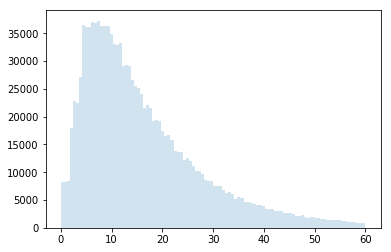

In [35]:
fig, ax = plt.subplots(1, 1)
ax.hist(combined_sm60,  histtype='stepfilled', alpha=0.2,bins = 100)

In [15]:
skewnorm.fit(combined_sm60)

(13.370038688911702, 1.9546388302078148, 18.297057534693902)

(array([1.1600e+02, 3.7090e+03, 2.7455e+04, 6.4546e+04, 7.8801e+04,
        7.8491e+04, 7.5762e+04, 7.2751e+04, 6.8869e+04, 6.4443e+04,
        6.0053e+04, 5.5211e+04, 4.9739e+04, 4.5243e+04, 4.0030e+04,
        3.5354e+04, 3.0484e+04, 2.6666e+04, 2.2873e+04, 1.9164e+04,
        1.6196e+04, 1.3549e+04, 1.0880e+04, 8.5540e+03, 7.1730e+03,
        5.6830e+03, 4.4540e+03, 3.4310e+03, 2.6780e+03, 2.0440e+03,
        1.5050e+03, 1.1550e+03, 8.6100e+02, 5.6900e+02, 4.5900e+02,
        3.1000e+02, 2.3800e+02, 1.4400e+02, 1.1200e+02, 7.9000e+01,
        5.6000e+01, 3.7000e+01, 3.1000e+01, 1.5000e+01, 1.4000e+01,
        6.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-3.32293998, -1.45955625,  0.40382747,  2.2672112 ,  4.13059492,
         5.99397865,  7.85736237,  9.7207461 , 11.58412982, 13.44751355,
        15.31089728, 17.174281  , 19.03766473, 20.90104845, 22.76443218,
        24.6278159 , 26.49119963, 28.35458336, 30.21796708, 32.08135081,
        33.94473453, 35.80

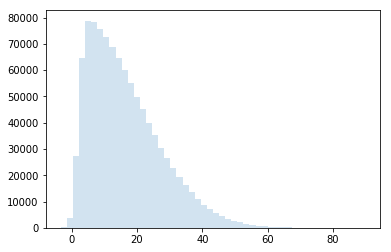

In [33]:
sn60 = skewnorm(13.370038688911702, 1.9546388302078148, 18.297057534693902)
r = sn60.rvs(size=1000000)

fig, ax = plt.subplots(1, 1)
ax.hist(r, histtype='stepfilled', alpha=0.2,bins = 50)

In [17]:
# ==============methods 3 linear regression ===============

In [18]:
def get_xy_by_bin(combined,binnum = 1000):
    x = []
    y = []
    hist,binedge = np.histogram(combined, bins=binnum)
    for i in range(hist.shape[0]):
        ytemp = hist[i]/2
        xtemp = (binedge[i] + binedge[i+1])/2
        x.append(xtemp)
        y.append(ytemp)
    x = [[ax] for ax in x]
    return x, y

In [19]:
def run_high_demision(dt,dim = 2):
    x,y = get_xy_by_bin(dt)
    for onex in x:
        for expo in range(2,dim+1):
            onex.append(onex[0]**expo)
    reg = linear_model.Lasso(alpha=.1, fit_intercept=False)
    return reg.fit(x,y)

def predict_high_demision(x, reg, dim = 2):
    x = [[ax] for ax in x]
    for onex in x:
        for expo in range(2,dim+1):
            onex.append(onex[0]**expo)
    return reg.predict(x)

C:\Users\anshi\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\anshi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


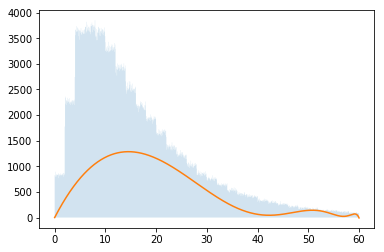

In [20]:
ndim = 100

lasso = run_high_demision(combined_sm60,dim = ndim)

fig, ax = plt.subplots(1, 1)
xy = ax.hist(combined_sm60, histtype='stepfilled', alpha=0.2,bins = 1000)
pred_x = xy[1]
pred_y = predict_high_demision(pred_x,lasso,dim = ndim)
ax.plot(pred_x, pred_y)

In [21]:
hist,binedge = np.histogram(combined_sm60, bins=1000)

In [24]:
# smoothing curve

In [25]:
dfcon = pd.DataFrame(blue[['ge','sml','sum']])
dfcon['sum'] = dfcon['sum'] + white['sum']
dfcon.at[30,'sml'] = 200

def interpolate_after_60(endval,df):
    ge = df.at[30,'ge']
    area = df.at[30,'sum']
    endidx = 30 + (endval-60)//2
    starth = 2*area/(endval - 60)
    for idx in range(30, endidx):
        ge = 60 + (idx-30) * 2
        df.at[idx,'ge'] = ge
        df.at[idx,'sml'] = ge+2
        curh = (endval * starth - ge * starth)/ (endval -60)
        df.at[idx,'sum'] = curh
    curidx = df.index[-1] + 1
    starth = df['sum'].values[-1]
    startge = df['ge'].values[-1]
    while curidx < 101:
        ge = 2 * curidx
        df.at[curidx, 'ge'] = ge
        df.at[curidx,'sml'] = ge+2
        val = (200 * starth - ge * starth)/ (200 -startge)
        df.at[curidx, 'sum'] = val
        curidx += 1
    return df

indf = interpolate_after_60(80,dfcon.copy())

In [26]:
indf

,ge,sml,sum
0,0.0,2.0,27782.960000
1,2.0,4.0,75545.970000
2,4.0,6.0,121002.970000
3,6.0,8.0,123625.890000
4,8.0,10.0,120441.810000
5,10.0,12.0,110013.080000
6,12.0,14.0,97373.420000
7,14.0,16.0,84165.360000
8,16.0,18.0,72513.040000
9,18.0,20.0,64396.610000


In [27]:
x = (indf['ge'] + indf['sml'])/2
x = x.values
y = indf['sum'].values

x = np.insert(x, 0, 0)
y = np.insert(y, 0, 0)

In [28]:
y

array([0.00000000e+00, 2.77829600e+04, 7.55459700e+04, 1.21002970e+05,
       1.23625890e+05, 1.20441810e+05, 1.10013080e+05, 9.73734200e+04,
       8.41653600e+04, 7.25130400e+04, 6.43966100e+04, 5.53004400e+04,
       4.58822800e+04, 4.08023600e+04, 3.42614200e+04, 2.83126400e+04,
       2.51622300e+04, 2.13497400e+04, 1.78190800e+04, 1.51788800e+04,
       1.37319900e+04, 1.11172100e+04, 9.89958000e+03, 8.68929000e+03,
       7.21774000e+03, 6.27159000e+03, 5.67691000e+03, 4.74326000e+03,
       4.39328000e+03, 3.68180000e+03, 2.99975000e+03, 2.11281100e+03,
       1.90152990e+03, 1.69024880e+03, 1.47896770e+03, 1.26768660e+03,
       1.05640550e+03, 8.45124400e+02, 6.33843300e+02, 4.22562200e+02,
       2.11281100e+02, 2.07817475e+02, 2.04353851e+02, 2.00890226e+02,
       1.97426602e+02, 1.93962977e+02, 1.90499352e+02, 1.87035728e+02,
       1.83572103e+02, 1.80108479e+02, 1.76644854e+02, 1.73181230e+02,
       1.69717605e+02, 1.66253980e+02, 1.62790356e+02, 1.59326731e+02,
      

In [29]:
x

array([  0.,   1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,
        21.,  23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,
        43.,  45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,
        65.,  67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,
        87.,  89.,  91.,  93.,  95.,  97.,  99., 101., 103., 105., 107.,
       109., 111., 113., 115., 117., 119., 121., 123., 125., 127., 129.,
       131., 133., 135., 137., 139., 141., 143., 145., 147., 149., 151.,
       153., 155., 157., 159., 161., 163., 165., 167., 169., 171., 173.,
       175., 177., 179., 181., 183., 185., 187., 189., 191., 193., 195.,
       197., 199., 201.])

In [30]:
x.shape, y.shape

((102,), (102,))

In [31]:
f2 = interp1d(x,y ,kind='cubic')

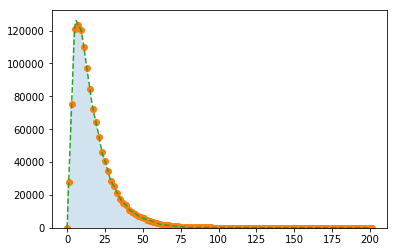

In [37]:
xnew = np.linspace(0, 200, num=1000, endpoint=True)
plt.hist(combined_sm60,  histtype='stepfilled', alpha=0.2,bins = 30)
plt.plot(x, y, 'o', xnew, f2(xnew), '--')
plt.show()